In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Image shape:  (192, 591, 4)


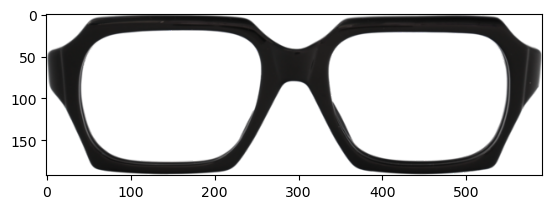

In [3]:
# load in sunglasses image with cv2 and IMREAD_UNCHANGED
sunglasses = cv2.imread('C:\ML\spectacle2.png', cv2.IMREAD_UNCHANGED)

# plot our image
plt.imshow(sunglasses)

# print out its dimensions
print('Image shape: ', sunglasses.shape)

The alpha channel looks like this (black pixels = transparent): 


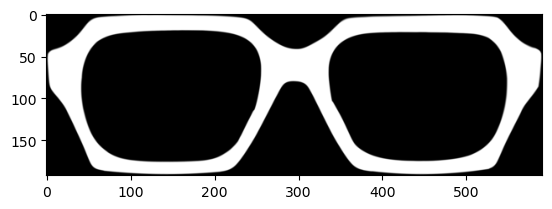

In [5]:
# print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('The alpha channel looks like this (black pixels = transparent): ')
plt.imshow(alpha_channel, cmap='gray')

In [6]:
# just to double check that there are indeed non-zero values
# let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('The non-zero values of the alpha channel are: ')
print (values)

The non-zero values of the alpha channel are: 
(array([  1,   1,   1, ..., 191, 191, 191], dtype=int64), array([ 97,  99, 100, ..., 465, 466, 467], dtype=int64))


In [7]:
# Load the pre-trained face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # Replace with the actual path

In [8]:
# Load the image from file

# image_path = input("Enter the path of the input image: ")
# frame = cv2.imread("manoj_test_f.jpg")
frame = cv2.imread("ML_training\Chris_Matthews_12.jpg")

In [9]:
# Convert the frame to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces in the frame
faces = detector(gray)

# Loop over the detected faces
for face in faces:
    # Get the facial landmarks for the face
    landmarks = predictor(gray, face)

    # Loop over the 68 facial landmarks and draw them on the frame
    for i, (x, y) in enumerate(zip(landmarks.parts(), landmarks.parts()[1:])):
        # cv2.circle(frame, (x.x, x.y), 1, (0, 0, 255), -1)
        # cv2.putText(frame, str(i), (x.x, x.y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA)
            
        # Calculate top-left location for sunglasses
        x_sunglasses = int(landmarks.part(17).x)  # x-coordinate of the edge of the left eyebrow
        y_sunglasses = int(landmarks.part(17).y)  # y-coordinate of the edge of the left eyebrow

        # Calculate height and width of sunglasses
        h = int(abs(landmarks.part(27).y - landmarks.part(33).y))  # Length of the nose
        w = int(abs(landmarks.part(17).x - landmarks.part(26).x))  # Distance between left and right eyebrow edges
            

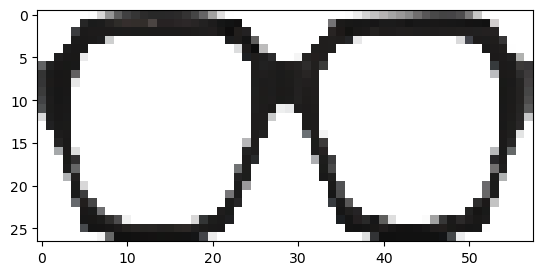

In [11]:
image_copy = np.copy(frame)
# read in sunglasses
sunglasses = cv2.imread('spectacle2.png', cv2.IMREAD_UNCHANGED)
# resize sunglasses
new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)
# plot our image
plt.imshow(new_sunglasses)
# get region of interest on the face to change
# [59:75,47:94]
roi_color = image_copy[y_sunglasses:y_sunglasses+h,x_sunglasses:x_sunglasses+w]

# find all non-transparent pts
# Calculate the indices of non-transparent points in the resized sunglasses
ind = np.argwhere(new_sunglasses[:, :, 3] > 0)

In [12]:
for i in range(3):
    if i == 0:
        roi_color[ind[:, 0], ind[:, 1], i] = 0 # Set red channel to maximum (255)
    else:
        roi_color[ind[:, 0], ind[:, 1], i] = 0  # Set green and blue channels to 0

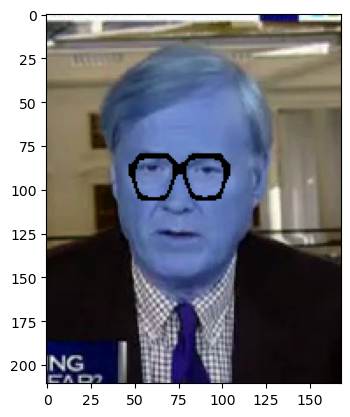

In [13]:
# Set the area of the image to the changed region with sunglasses
image_copy[y_sunglasses:y_sunglasses+h, x_sunglasses:x_sunglasses+w] = roi_color

# Display the resul
plt.imshow(image_copy)
plt.show()